In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [84]:
# get selected features
fts_sel_long = pd.read_csv('../Output/Submission-Long/features/Features_Selected.csv')
fts_sel_long = fts_sel_long['Feature'].values

fts_sel_delta = pd.read_csv('../Output/Submission-Delta/features/Features_Selected.csv')
fts_sel_delta = fts_sel_delta['Feature'].values

fts_sel = list(set(fts_sel_long).union(set(fts_sel_delta)))

df_fts = pd.read_csv('../Output/Submission-Long/features/Features_Rescaled.csv')
df_fts = df_fts[df_fts['Feature'].isin(fts_sel)]

In [85]:
# set model tag
df_fts['Model'] = ''
df_fts.loc[df_fts['Feature'].isin(fts_sel_long), 'Model'] = 'Longitudinal'
df_fts.loc[df_fts['Feature'].isin(fts_sel_delta), 'Model'] = 'Delta'

# get fts in both
fts_both = list(set(fts_sel_long).intersection(set(fts_sel_delta)))

df_fts.loc[df_fts['Feature'].isin(fts_both), 'Model'] = 'Both'

In [86]:
df_fts['Feature'].nunique()

21

In [87]:
fts_sel_long_plot = np.delete(fts_sel_long, np.where(fts_sel_long == 'glcm_JointEnergy'))
fts_sel_long_plot = np.delete(fts_sel_long, np.where(fts_sel_long == 'firstorder_Median'))

fts_sel_del_plot = np.delete(fts_sel_delta, np.where(fts_sel_delta == 'glcm_JointEnergy'))
fts_sel_del_plot = np.delete(fts_sel_delta, np.where(fts_sel_delta == 'firstorder_Median'))

In [88]:
fts_sel_del_plot = [x for x in fts_sel_del_plot if x not in fts_sel_long]
fts_sel_long_plot = [x for x in fts_sel_long_plot if x not in fts_sel_delta]

In [89]:
print('Features selected in Longitudinal model: ', len(fts_sel_long_plot))
print('Features selected in Delta model: ', len(fts_sel_del_plot))
print('Features selected in both models: ', len(fts_both))

Features selected in Longitudinal model:  9
Features selected in Delta model:  10
Features selected in both models:  2


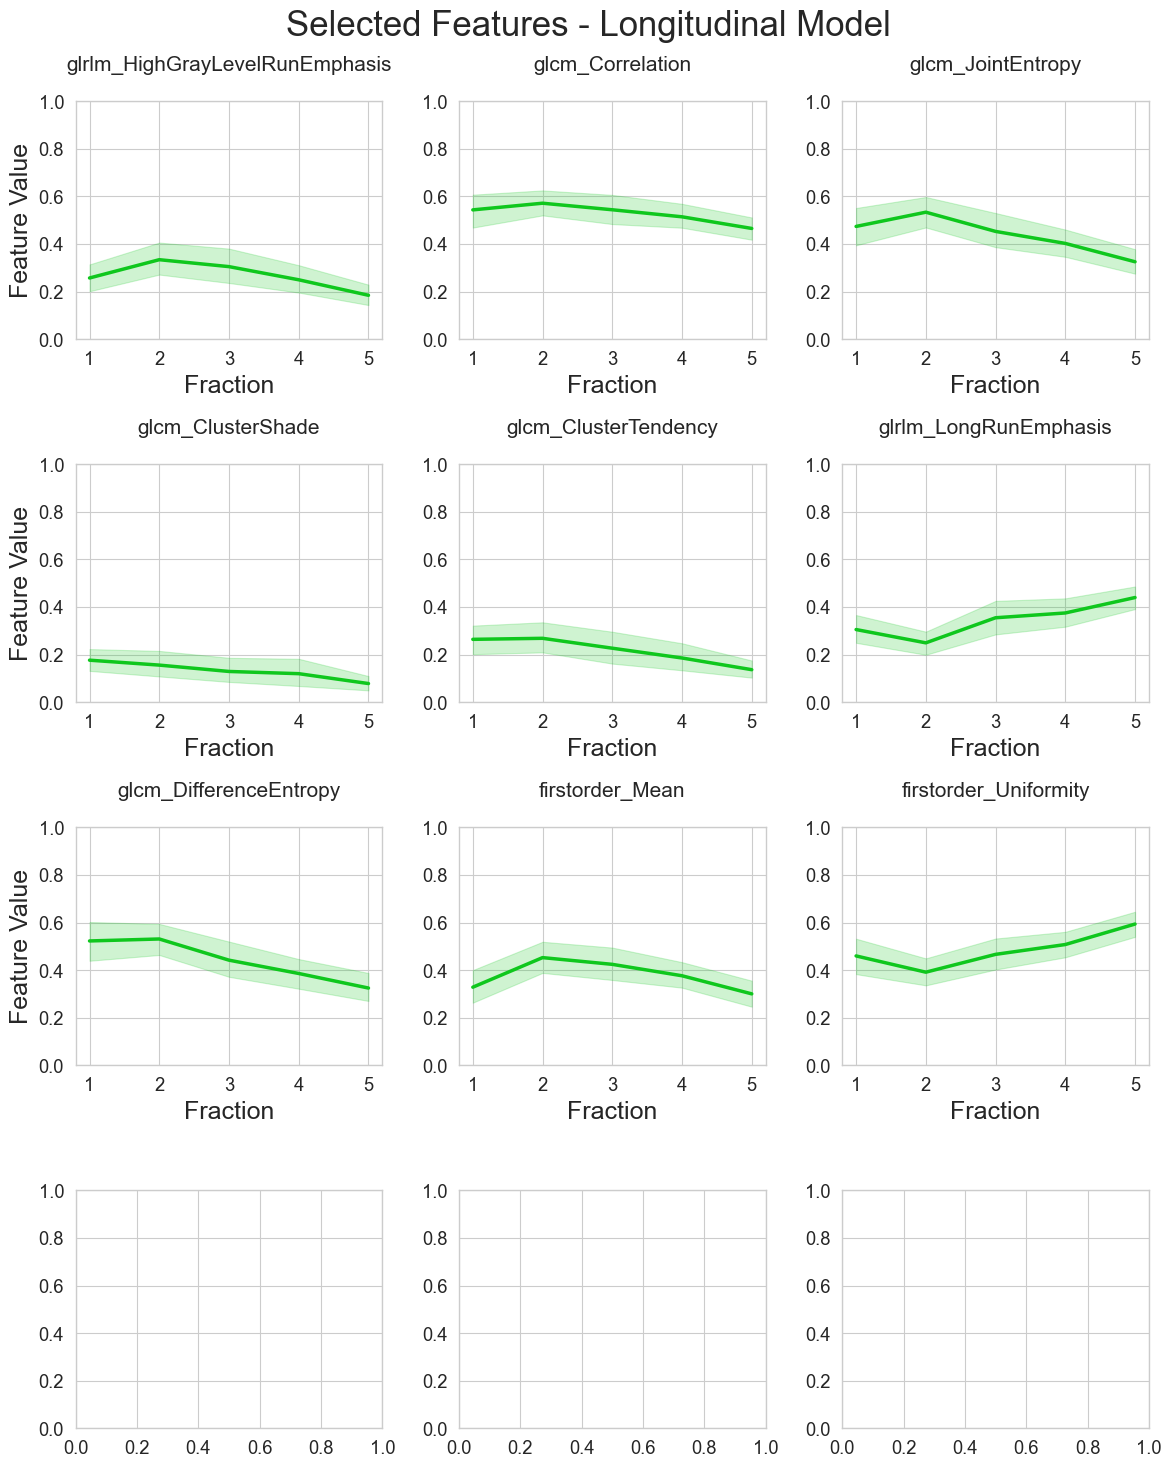

In [90]:
# longitudinal features
fig, axes = plt.subplots(figsize=(12, 15), nrows=4, ncols=3)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
for i, ax in enumerate(axes.flatten()):
    if i >= len(fts_sel_long_plot):
        
        continue
    ft = fts_sel_long_plot[i]
    sns.lineplot(x='Fraction', y='FeatureValue', color='#0fc71d',
                  data=df_fts[df_fts['Feature'] == ft], ax=ax,
                errorbar=('ci', 95), estimator=np.mean,
                legend=False, linewidth=2.5)
    ax.set_title(f'{ft}\n', fontsize=15)
    ax.set_ylim(0, 1)
    

    ax.set_xlabel('Fraction', fontsize=18)
    if i % 3 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Feature Value', fontsize=18)
plt.suptitle('Selected Features - Longitudinal Model', fontsize=25)

plt.tight_layout()
plt.savefig('./lineplot_sel_fts_long_no_crop.png', dpi=300)

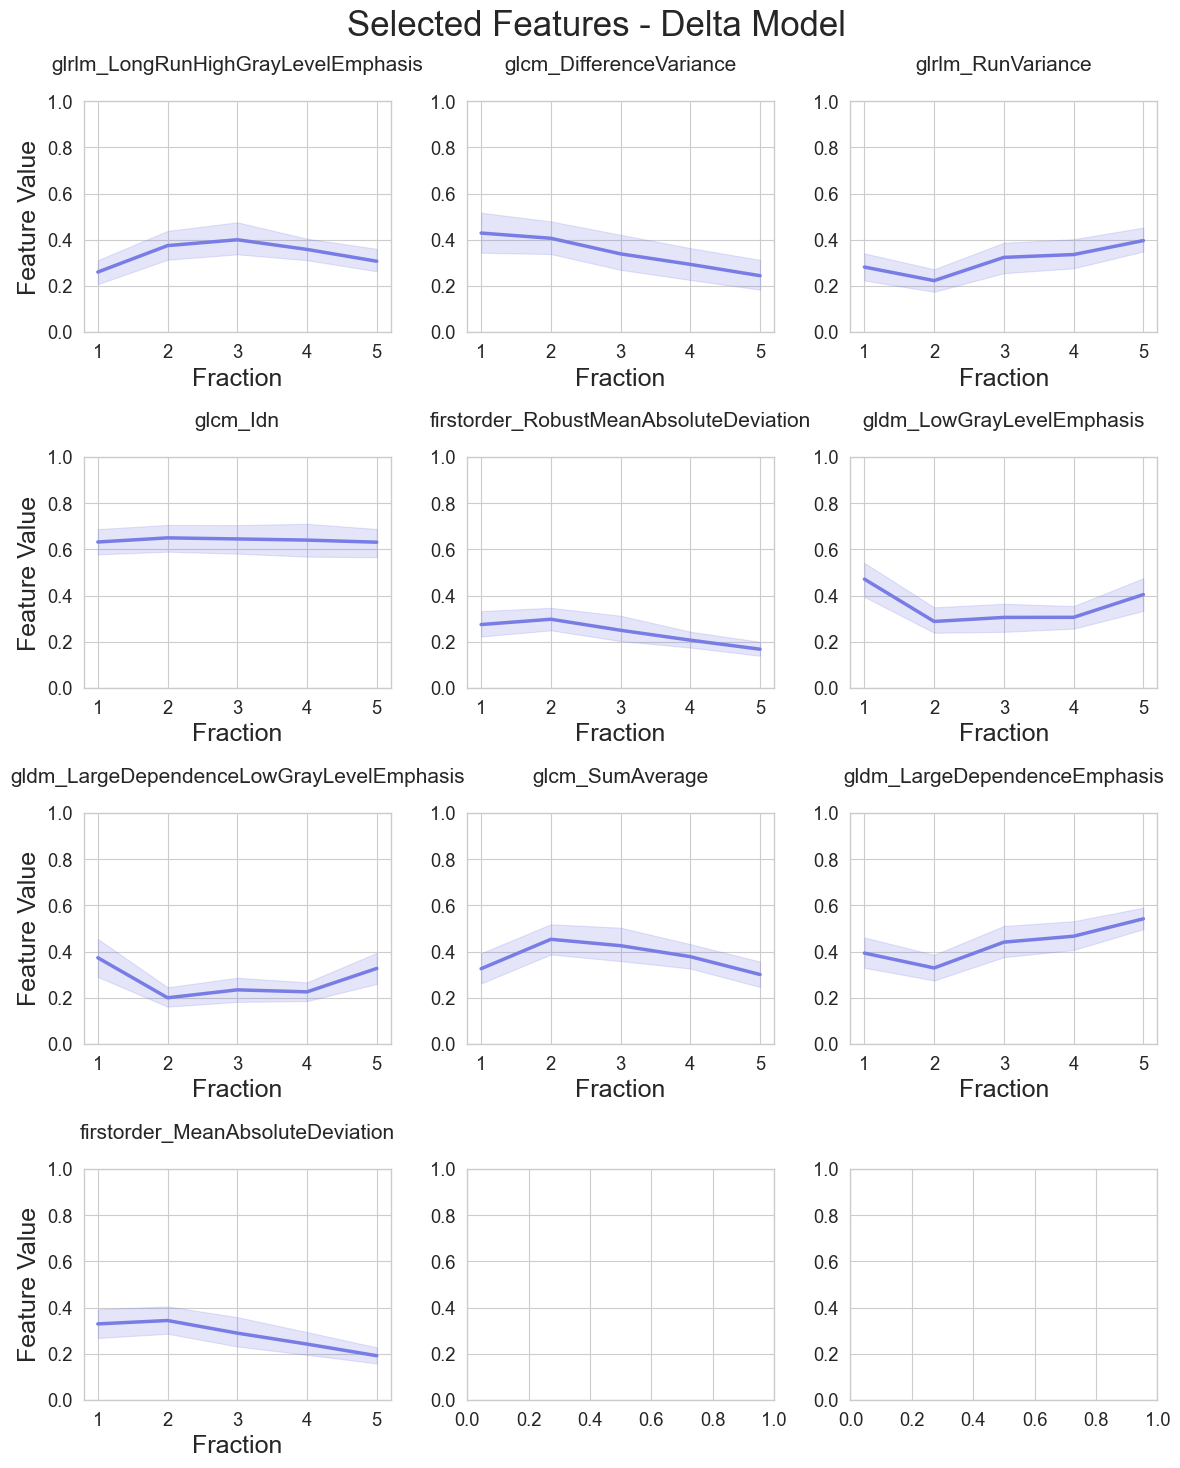

In [91]:
fts_sel_del_plot = fts_sel_del_plot[0:2] + fts_sel_del_plot[3:5] + fts_sel_del_plot[2:3] + fts_sel_del_plot[5:]
# longitudinal features
fig, axes = plt.subplots(figsize=(12, 15), nrows=4, ncols=3)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
for i, ax in enumerate(axes.flatten()):
    if i >= len(fts_sel_del_plot):
        
        continue
    ft = fts_sel_del_plot[i]
    sns.lineplot(x='Fraction', y='FeatureValue', color='#787de5',
                  data=df_fts[df_fts['Feature'] == ft], ax=ax,
                errorbar=('ci', 95), estimator=np.mean,
                legend=False, linewidth=2.5)
    ax.set_title(f'{ft}\n', fontsize=15)
    ax.set_ylim(0, 1)
    
    # if i < 6:
    #     ax.set_xlabel('')
    # else:
    ax.set_xlabel('Fraction', fontsize=18)
    if i % 3 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Feature Value', fontsize=18)
plt.suptitle('Selected Features - Delta Model', fontsize=25)

plt.tight_layout()
plt.savefig('./lineplot_sel_fts_delta_nocrop.png', dpi=300)

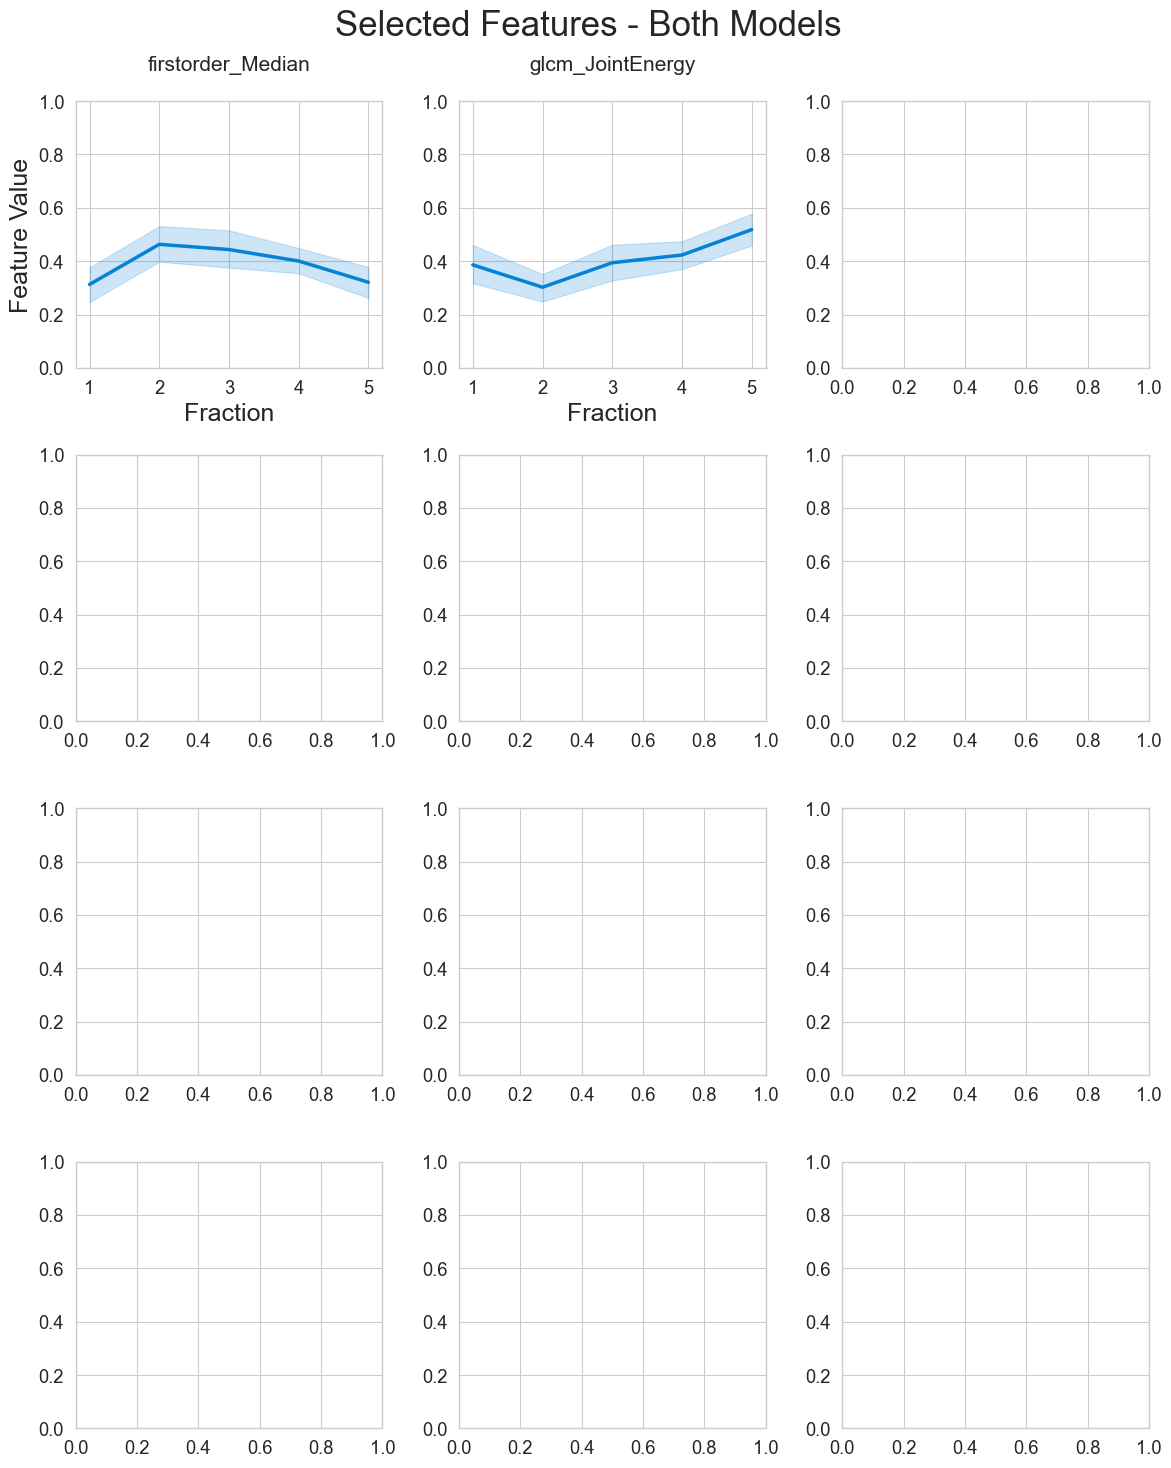

In [92]:
# longitudinal features
fig, axes = plt.subplots(figsize=(12, 15), nrows=4, ncols=3)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
for i, ax in enumerate(axes.flatten()):
    if i >= len(fts_both):
        
        continue
    ft = fts_both[i]
    sns.lineplot(x='Fraction', y='FeatureValue', color='#0581d6',
                  data=df_fts[df_fts['Feature'] == ft], ax=ax,
                errorbar=('ci', 95), estimator=np.mean,
                legend=False, linewidth=2.5)
    ax.set_title(f'{ft}\n', fontsize=15)
    ax.set_ylim(0, 1)
    
    # if i < 6:
    #     ax.set_xlabel('')
    # else:
    ax.set_xlabel('Fraction', fontsize=18)
    if i % 3 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Feature Value', fontsize=18)
plt.suptitle('Selected Features - Both Models', fontsize=25)

plt.tight_layout()
plt.savefig('./lineplot_sel_fts_both_nocrop.png', dpi=300)